In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with the correct file path)
df = pd.read_csv('/content/crop_yield.csv')

# Handling missing values (nulls)
# For numerical columns, fill null values with the median value
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# For categorical columns, fill null values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# --- Feature Engineering Steps ---
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale the numerical features (important for models like KNN, SVM, etc.)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# --- Optional: Feature Selection ---
# Feature selection can be done later based on feature importance from models or correlation analysis.

# Save the cleaned and preprocessed data
df.to_csv('/content/cleaned_crop_yield.csv', index=False)

print("Null values filled, and feature engineering completed successfully.")


Null values filled, and feature engineering completed successfully.


In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,-1.866375,4,2,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128
1,1,-1.866375,1,2,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225
2,8,-1.866375,1,2,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763
3,9,-1.866375,4,2,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928
4,11,-1.866375,1,2,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555


Null values filled, and feature engineering completed successfully.


<Figure size 1200x800 with 0 Axes>

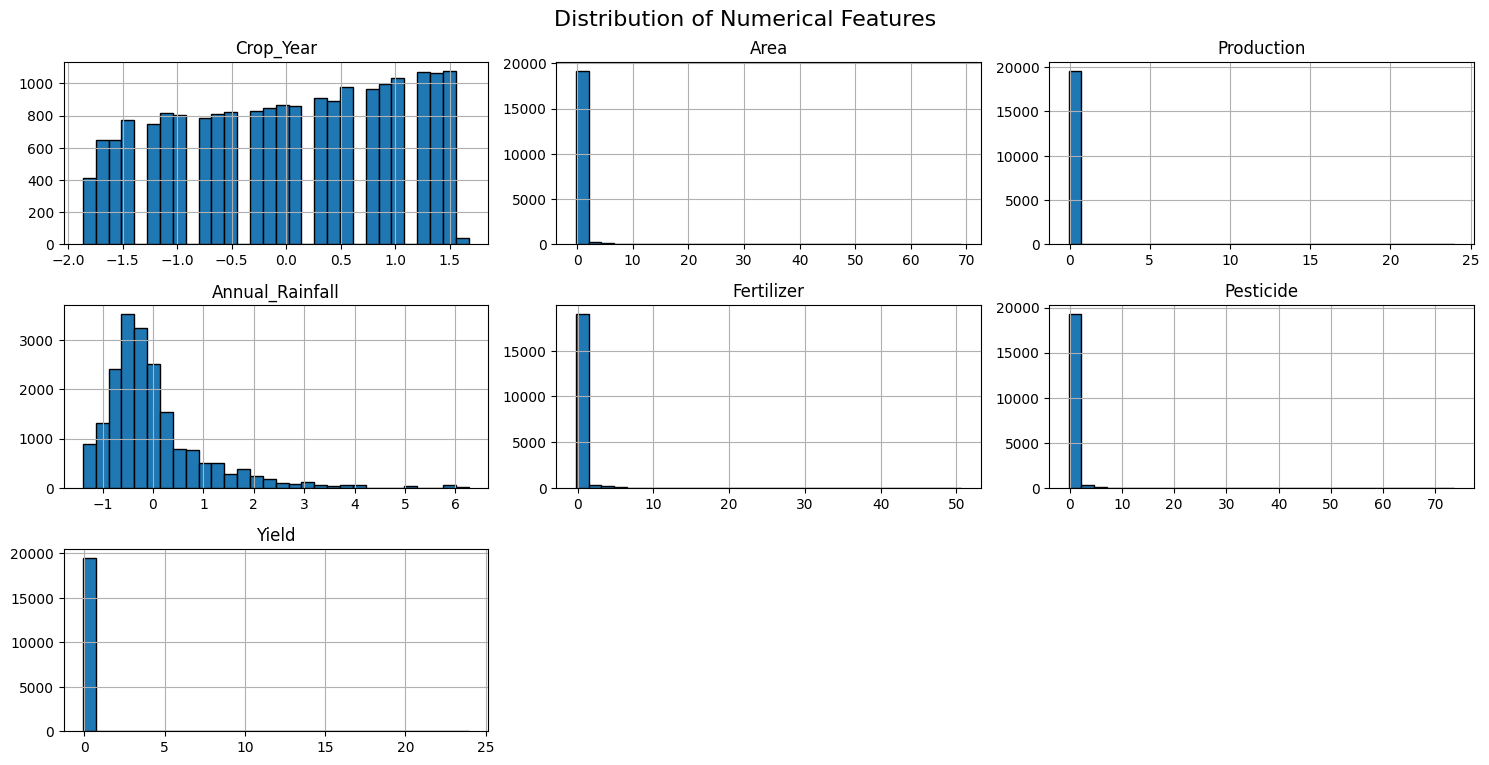

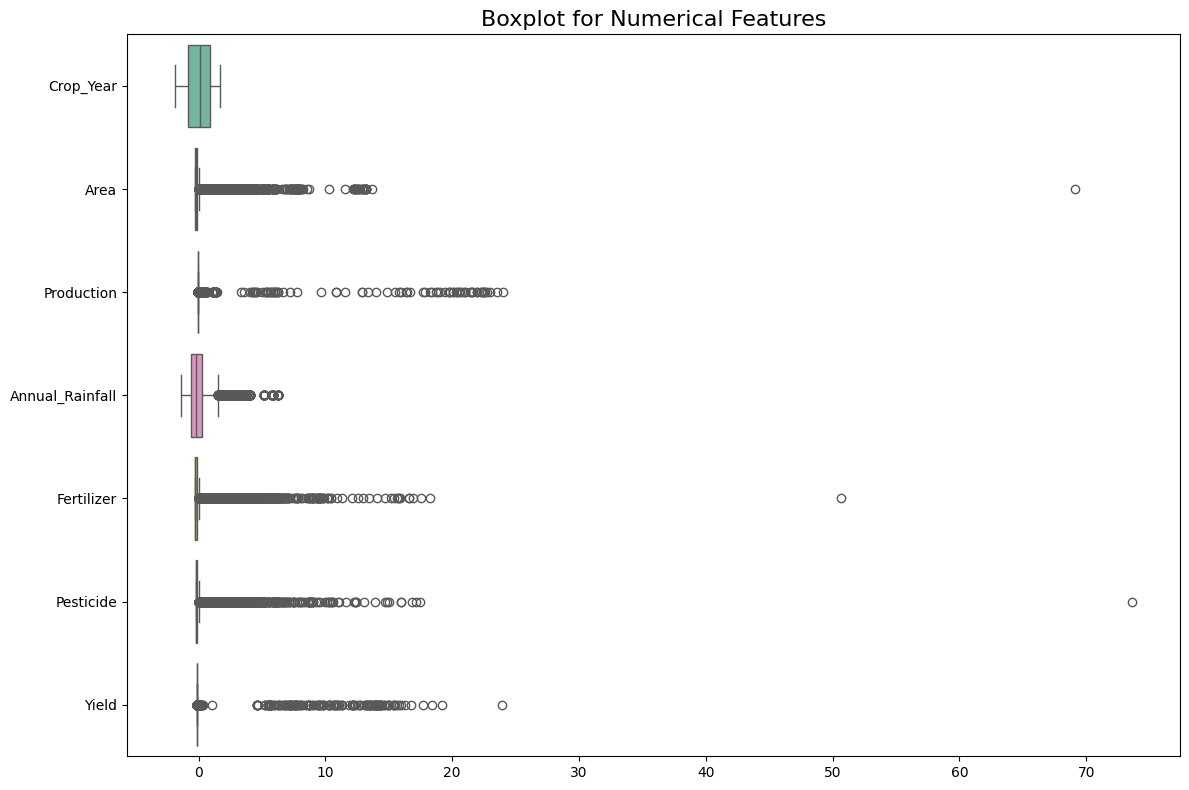

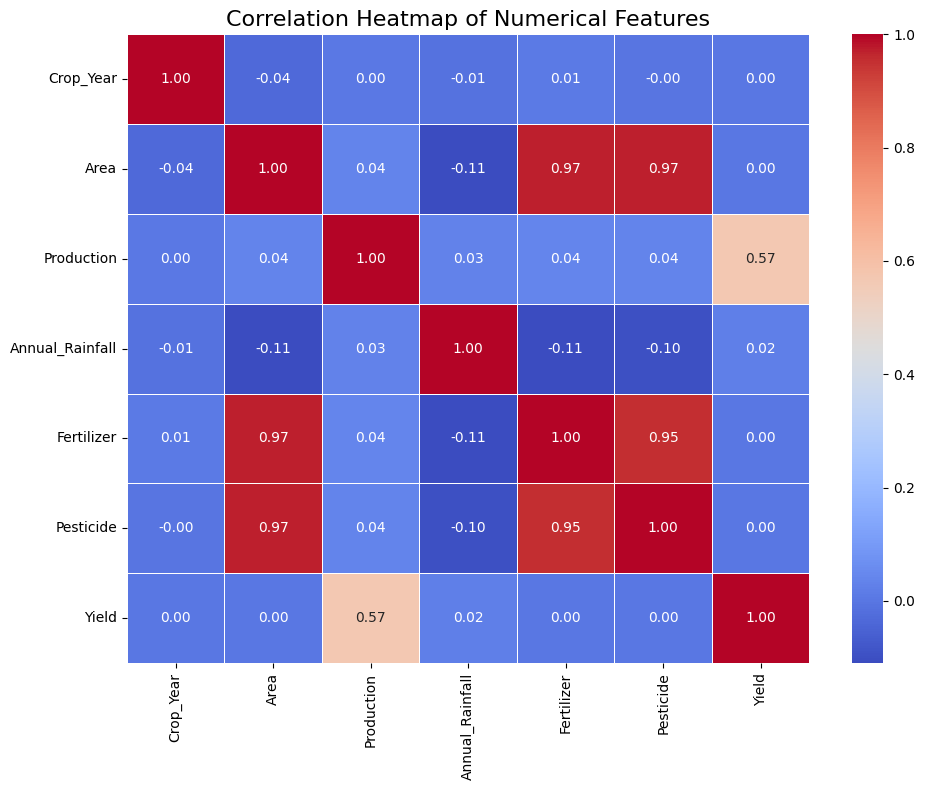

<ipython-input-4-e33fcebe6a41>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-4-e33fcebe6a41>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-4-e33fcebe6a41>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


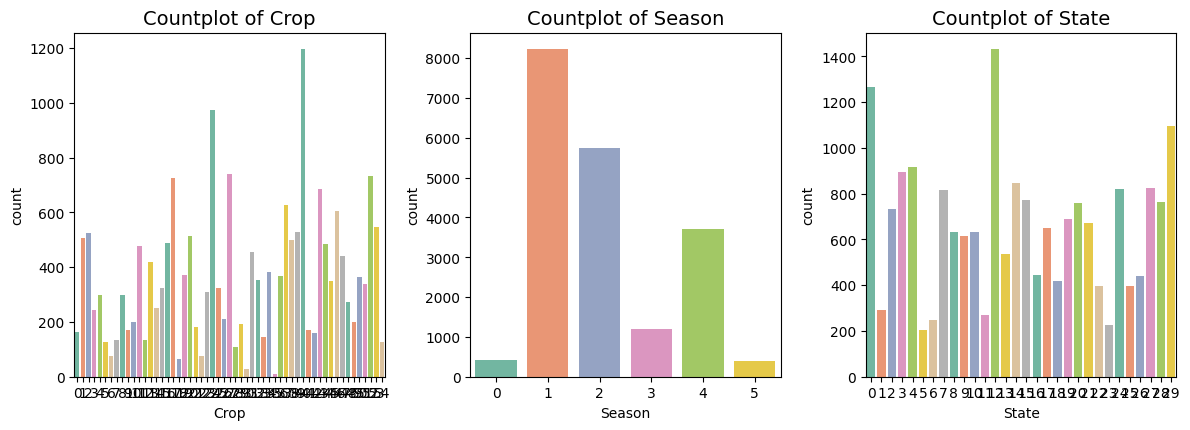

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with the correct file path)
df = pd.read_csv('/content/crop_yield.csv')

# Handling missing values (nulls)
# For numerical columns, fill null values with the median value
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# For categorical columns, fill null values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# --- Feature Engineering Steps ---
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale the numerical features (important for models like KNN, SVM, etc.)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# --- Optional: Feature Selection ---
# Feature selection can be done later based on feature importance from models or correlation analysis.

# Save the cleaned and preprocessed data
df.to_csv('/content/cleaned_crop_yield.csv', index=False)

print("Null values filled, and feature engineering completed successfully.")

# --- Visualizations ---

# 1. Distribution of numerical features (histograms)
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(4, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplot for numerical features to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title('Boxplot for Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# 4. Count plot for categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust number of rows and columns as needed
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'Countplot of {col}', fontsize=14)
    plt.tight_layout()
plt.show()
